In [1]:
import numpy as np
from gravitationalSolver import GravitationalSolver
from AnimatedScatter import AnimatedScatter
import matplotlib.pyplot as plt
from IPython.display import HTML
import time

Сomparison of the results of solving the problem by the odeint method and the verlet method
======

In [2]:
#Initialise parameter for solar system
astronomical_unit = 1.496e11
weights = np.array([1.989e30, 0.3281e24, 4.811e24, 5.9761e24, 0.6331e24, 1876.6431e24, 561.801e24, 86.0541e24, 101.5921e24, 0.01191e24]) #kilo
speeds = np.array([0.0, 58.93, 35.18, 29.66, 23.6, 13.03, 10.16, 6.52, 5.43, 5.97]) * 3600 * 1000  #convert to metrs per hours
positions = np.array([[0.0, 0.0], [0.31, 0.1], [0.72, 0.11], [1.0, 0.12], [1.56, 0.13], [5.21, 0.14], [9.05, 0.15], [20.0, 0.16], [30.09, 0.17], [30.5, 0.18]])
positions *= astronomical_unit
max_time = 10000
dt = 1e0

In [3]:
#Сreating a class member containing functions for solve task with different methods
solver = GravitationalSolver(weights, speeds, positions)

In [4]:
#get solutions 
solution_ode = solver.solve_odeint(max_time, dt) / astronomical_unit
solution_verlet = solver.solve_verlet(max_time, dt) / astronomical_unit

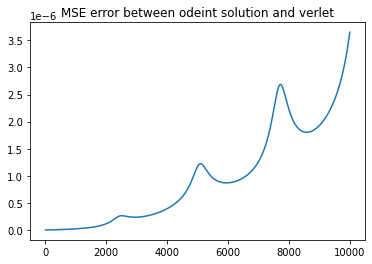

In [5]:
plt.title('MSE error between odeint solution and verlet')
plt.plot(np.sum((solution_ode - solution_verlet) ** 2, axis=-1))


In [6]:
#get positions from solution
pos_x, pos_y = solution_verlet[:, :len(weights)], solution_verlet[:, len(weights):2*len(weights)] 

Solar system visualization (only 4 planets)
===

<img src="solar_sytem_verlet.gif" width="450" align="center">

Check verlet method acceleration
===

In [5]:
#generate random parametrs
#amount_elements = [50, 100, 200, 300]
amount_elements = [20, 50, 100, 200]
amount_repeats = 3
weights, speeds, positions = [], [], []
for N in amount_elements:
    weights.append(np.random.random(N))
    speeds.append(np.random.random(N))
    positions.append(np.random.random((N, 2)))
max_time = 100
dt = 1e0


In [6]:
pure_time, thread_pool_time, thread_time, mp_time, cython_time, cl_time = [], [], [], [], [], []

for i in range(len(weights)):
    solver = GravitationalSolver(weights[i], speeds[i], positions[i])
    pure_time.append(0.)
    thread_pool_time.append(0.)
    thread_time.append(0.)
    mp_time.append(0.)
    cython_time.append(0.)
    cl_time.append(0.)
    for j in range(amount_repeats):
        start_time = time.time()
        sol = solver.solve_verlet(max_time=max_time, dt=dt)
        pure_time[i] += (time.time() - start_time)/amount_repeats

        start_time = time.time()
        sol = solver.solve_verlet_threading_pool(max_time=max_time, dt=dt)
        thread_pool_time[i] += (time.time() - start_time)/amount_repeats

        start_time = time.time()
        sol = solver.solve_verlet_cl(max_time=max_time, dt=dt)
        cl_time[i] += (time.time() - start_time)/amount_repeats

        start_time = time.time()
        sol = solver.solve_verlet_multitasking(max_time=max_time, dt=dt)
        mp_time[i] += (time.time() - start_time)/amount_repeats

        start_time = time.time()
        sol = solver.solve_verlet_threading(max_time=max_time, dt=dt)
        thread_time[i] += (time.time() - start_time)/amount_repeats

        start_time = time.time()
        sol = solver.solve_verlet_cython(max_time=max_time, dt=dt)
        cython_time[i] += (time.time() - start_time)/amount_repeats
    print(i)



0
1
2
3


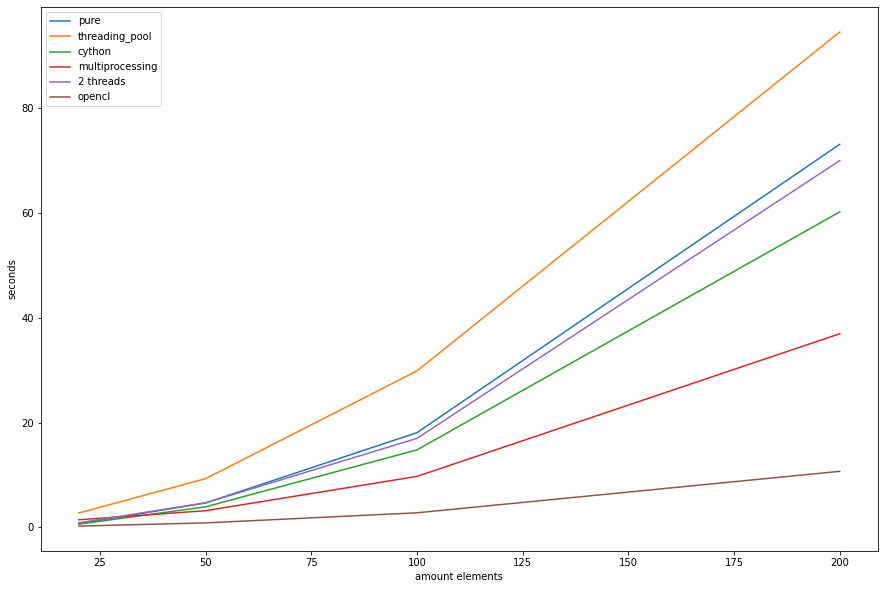

In [7]:
fig = plt.figure(figsize=(15, 10))
plt.plot(amount_elements, pure_time, label='pure')
plt.plot(amount_elements, thread_pool_time, label='threading_pool')
plt.plot(amount_elements, cython_time, label='cython')
plt.plot(amount_elements, mp_time, label='multiprocessing')
plt.plot(amount_elements, thread_time, label='2 threads')
plt.plot(amount_elements, cl_time, label='opencl')
plt.xlabel('amount elements')
plt.ylabel('seconds')
plt.legend()